<a href="https://colab.research.google.com/github/NabilahSharfina/TELCO-CUSTOMER-CHURN/blob/main/Program_Klasifikasi_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A. Connect Google Drive

In [1]:
# Load data from google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# B. Import Library

In [2]:
import math
from collections import Counter
from pprint import pprint

import pandas as pd # for handling and cleaning the dataset
import numpy as np # for performing mathematical calculations behind ML algorithms
import matplotlib.pyplot as plt # for visualization
import seaborn as sns # for visualization

# One Hot Encoding: digunakan untuk bukan tipe data ordinal, misal nominal, interval, dan ratio
from sklearn.preprocessing import OneHotEncoder
# Ordinal Encoding: digunakan untuk tipe data ordinal
from sklearn.preprocessing import LabelEncoder

# Scalling Data
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Handle imbalance dataset
from imblearn.over_sampling import SMOTE

# Splitting Data
from sklearn.model_selection import train_test_split

# Modelling
# !pip install lightgbm
# import lightgbm as lgbm
# from xgboost import XGBClassifier
# from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
# from sklearn.linear_model import LogisticRegression
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.neighbors import KNeighborsClassifier

# For feature importance
from sklearn.datasets import make_classification

import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc

# For Hyperparameter Tuning
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

# C. Data Preprocessing

## 1.1 Data Cleaning

In [3]:
df = pd.read_csv("/content/drive/MyDrive/ITTP/KULIAH/SEMESTER 7/TUGAS AKHIR 2/IBM Dataset/IBM-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df = pd.read_csv("/content/drive/MyDrive/ITTP/KULIAH/SEMESTER 7/TUGAS AKHIR 2/IBM Dataset/IBM-Telco-Customer-Churn.csv")
df.drop('customerID', axis=1, inplace=True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


> In the context of customer churn, tenure refers to the length of time that a customer has been a subscriber or a customer of a company. It is typically measured in months.
Tenure is an important feature to consider when analyzing customer churn as it can provide insights into how long customers have been engaged with the company and how loyal they are likely to be. Customers with longer tenure may be less likely to leave the company compared to newer customers.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [6]:
# This column had missing values represented by ' '
# I noticed it when I tried converting it to float 
# and it gave me an error that it could not convert "string to float"
# df['TotalCharges'] = df['TotalCharges'].replace(' ', np.NaN)
# df['TotalCharges'] = df['TotalCharges'].astype(float)

# #The varaible was imported as a string we need to convert it to float
# telecom['TotalCharges'] = telecom['TotalCharges'].astype(float) 
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')

In [7]:
df.dtypes.value_counts()

object     16
int64       2
float64     2
dtype: int64

In [8]:
# Melihat apakah ada missing value dari dataset
df.isna().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [9]:
# Mengisi missing value dengan nilai median
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())
# https://www.naukri.com/learning/articles/handling-missing-data-mean-median-mode/

# Melihat apakah ada missing value dari dataset
df.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [10]:
# Mengecek baris yang duplikat
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Length: 7043, dtype: bool

## 1.2 Data Transformation

In [11]:
# df['gender'] = df['gender'].map({'Male': 0, 'Female': 1})
df['Churn'] = df['Churn'].map({'No': 0, 'Yes': 1})

df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [12]:
print ('Total Customer Loyal\t: {}'.format(df.Churn.value_counts()[0]))
print ('Total Customer Churn\t: {}'.format(df.Churn.value_counts()[1]))

Total Customer Loyal	: 5174
Total Customer Churn	: 1869


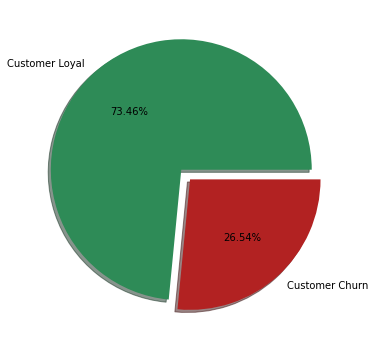

In [13]:
fig, ax = plt.subplots(figsize=(6, 6))
plt.pie(x=df["Churn"].value_counts(),
        colors=["seagreen", "firebrick"], 
        labels=["Customer Loyal", "Customer Churn"], 
        shadow = True, 
        autopct="%1.2f%%",
        explode=(0, 0.1)
        )

plt.show()

In [14]:
df.gender.value_counts()
# 0 = Laki-laki
# 1 = Perempuan

Male      3555
Female    3488
Name: gender, dtype: int64

In [15]:
print ('Total Laki-laki\t: {}'.format(df.gender.value_counts()['Male']))
print ('Total Perempuan\t: {}'.format(df.gender.value_counts()['Female']))

Total Laki-laki	: 3555
Total Perempuan	: 3488


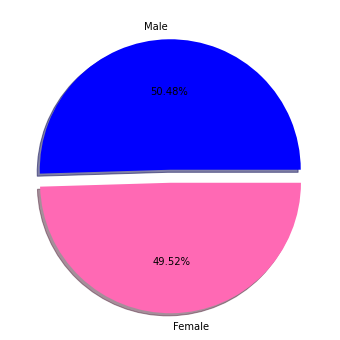

In [16]:
fig, ax = plt.subplots(figsize=(6, 6))
plt.pie(x=df["gender"].value_counts(), 
        colors=["blue", "hotpink"], 
        labels=["Male", "Female"], 
        shadow = True, 
        autopct="%1.2f%%", 
        explode=(0, 0.1)
        )

plt.show()

In [17]:
# Grouping
group = df.groupby('gender').Churn.value_counts()
gender_status = pd.crosstab(df.gender, df.Churn)

print(group)
gender_status

gender  Churn
Female  0        2549
        1         939
Male    0        2625
        1         930
Name: Churn, dtype: int64


Churn,0,1
gender,,
Female,2549,939
Male,2625,930


In [18]:
# Replace redundant values
df.replace({'No phone service': 'No',
            'No internet service': 'No'},
            inplace=True)

df['SeniorCitizen'].replace({0:'No',
                             1:'Yes'},
                             inplace=True)

In [19]:
df['PaymentMethod'] = df['PaymentMethod'].str.replace('(automatic)', '').str.replace('(', '').str.replace(')', '')

<ipython-input-19-8a23f69f901d>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['PaymentMethod'] = df['PaymentMethod'].str.replace('(automatic)', '').str.replace('(', '').str.replace(')', '')
<ipython-input-19-8a23f69f901d>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['PaymentMethod'] = df['PaymentMethod'].str.replace('(automatic)', '').str.replace('(', '').str.replace(')', '')


## 1.3 Feature Selection

In [20]:
# Mengetahui kolom apa saja yang termasuk fitur (variabel) numerik/kategoris
numerical_features = df.select_dtypes(include="number").columns.tolist()
categorical_features = df.select_dtypes(include="object").columns.tolist()

print("Numerical features:")
pprint(numerical_features)
print("\nCategorical features:")
pprint(categorical_features, compact=True)

Numerical features:
['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']

Categorical features:
['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
 'Contract', 'PaperlessBilling', 'PaymentMethod']


In [21]:
columns = df.columns
print("********** Numeric field **********n")
for i in range(len(columns)):
    if df[columns[i]].dtypes!=object:
        print("Unique of {} -> {}".format(columns[i], len(df[columns[i]].unique())))
        
print("\n********** Categorical field **********n")
for i in range(len(columns)):
    if df[columns[i]].dtypes==object:
        print("Unique of {} -> {}".format(columns[i], len(df[columns[i]].unique())))

********** Numeric field **********n
Unique of tenure -> 73
Unique of MonthlyCharges -> 1585
Unique of TotalCharges -> 6531
Unique of Churn -> 2

********** Categorical field **********n
Unique of gender -> 2
Unique of SeniorCitizen -> 2
Unique of Partner -> 2
Unique of Dependents -> 2
Unique of PhoneService -> 2
Unique of MultipleLines -> 2
Unique of InternetService -> 3
Unique of OnlineSecurity -> 2
Unique of OnlineBackup -> 2
Unique of DeviceProtection -> 2
Unique of TechSupport -> 2
Unique of StreamingTV -> 2
Unique of StreamingMovies -> 2
Unique of Contract -> 3
Unique of PaperlessBilling -> 2
Unique of PaymentMethod -> 4


In [22]:
for i in range(len(numerical_features)):
    print("********** {} **********".format(numerical_features[i]))
    print(df[numerical_features[i]].unique(), "\n")

********** tenure **********
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39] 

********** MonthlyCharges **********
[29.85 56.95 53.85 ... 63.1  44.2  78.7 ] 

********** TotalCharges **********
[  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ] 

********** Churn **********
[0 1] 



In [23]:
for i in range(len(categorical_features)):
    print("********** {} **********".format(categorical_features[i]))
    print(df[categorical_features[i]].unique(), "\n")

********** gender **********
['Female' 'Male'] 

********** SeniorCitizen **********
['No' 'Yes'] 

********** Partner **********
['Yes' 'No'] 

********** Dependents **********
['No' 'Yes'] 

********** PhoneService **********
['No' 'Yes'] 

********** MultipleLines **********
['No' 'Yes'] 

********** InternetService **********
['DSL' 'Fiber optic' 'No'] 

********** OnlineSecurity **********
['No' 'Yes'] 

********** OnlineBackup **********
['Yes' 'No'] 

********** DeviceProtection **********
['No' 'Yes'] 

********** TechSupport **********
['No' 'Yes'] 

********** StreamingTV **********
['No' 'Yes'] 

********** StreamingMovies **********
['No' 'Yes'] 

********** Contract **********
['Month-to-month' 'One year' 'Two year'] 

********** PaperlessBilling **********
['Yes' 'No'] 

********** PaymentMethod **********
['Electronic check' 'Mailed check' 'Bank transfer ' 'Credit card '] 



## 1.4 Summary Statistic

In [24]:
# Memahami karakteristik data melalui fitur-fitur numerik dengan function describe()
df[numerical_features].describe().T

,count,mean,std,min,25%,50%,75%,max
tenure,7043.0,32.371149,24.559481,0.00,9.000,29.000,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.500,70.350,89.85,118.75
TotalCharges,7043.0,2281.916928,2265.270398,18.80,402.225,1397.475,3786.60,8684.80
Churn,7043.0,0.265370,0.441561,0.00,0.000,0.000,1.00,1.00


In [25]:
# Memahami karakteristik data melalui fitur-fitur kategori dengan function describe()
df[categorical_features].describe().T

,count,unique,top,freq
gender,7043,2,Male,3555
SeniorCitizen,7043,2,No,5901
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
MultipleLines,7043,2,No,4072
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,2,No,5024
OnlineBackup,7043,2,No,4614
DeviceProtection,7043,2,No,4621


## 1.5 Correlation

> [Referensi Korelasi Data](https://www.scribbr.com/statistics/pearson-correlation-coefficient/)

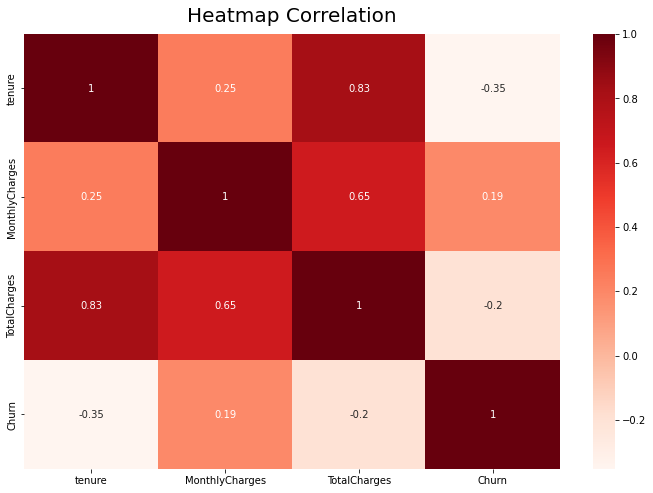

In [26]:
plt.subplots(figsize=(12, 8))
heatmap = sns.heatmap(df.corr(), annot = True, cmap=plt.cm.Reds)
heatmap.set_title('Heatmap Correlation', fontdict={'fontsize':20}, pad=12);

Text(0.5, 0, 'TotalCharges')

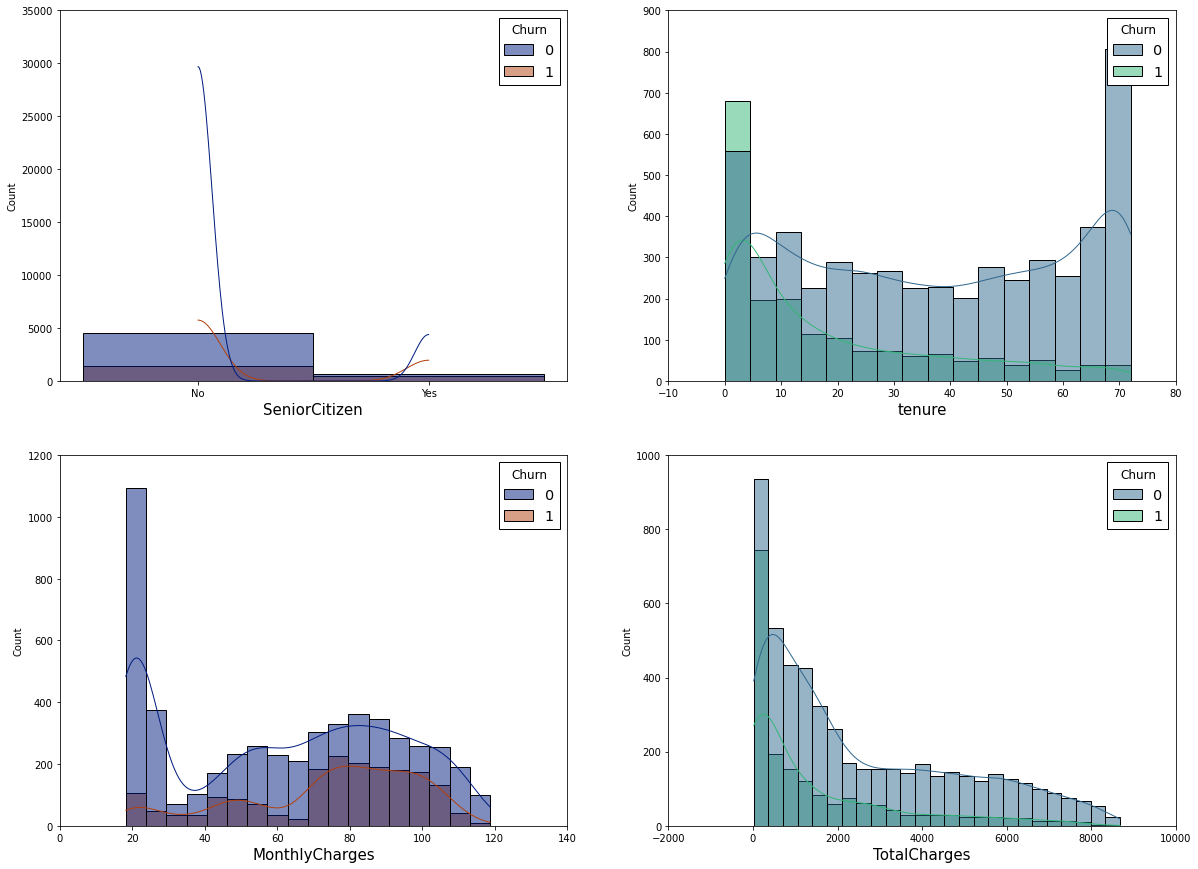

In [27]:
# Numerical Feature Visualization
fig, ax=plt.subplots(2, 2, figsize=(20, 15)) 
plt.style.use("classic")

sns.histplot(x=df["SeniorCitizen"], hue=df["Churn"], palette="dark", kde=True, ax=ax[0,0]);
ax[0,0].set_xlabel("SeniorCitizen", fontsize=15)
sns.histplot(x=df["tenure"], hue=df["Churn"], palette="viridis", kde=True, ax=ax[0,1]);
ax[0,1].set_xlabel("tenure", fontsize=15)
sns.histplot(x=df["MonthlyCharges"], hue=df["Churn"], palette="dark", kde=True, ax=ax[1,0]);
ax[1,0].set_xlabel("MonthlyCharges", fontsize=15)
sns.histplot(x=df["TotalCharges"], hue=df["Churn"], palette="viridis", kde=True, ax=ax[1,1]);
ax[1,1].set_xlabel("TotalCharges", fontsize=15)

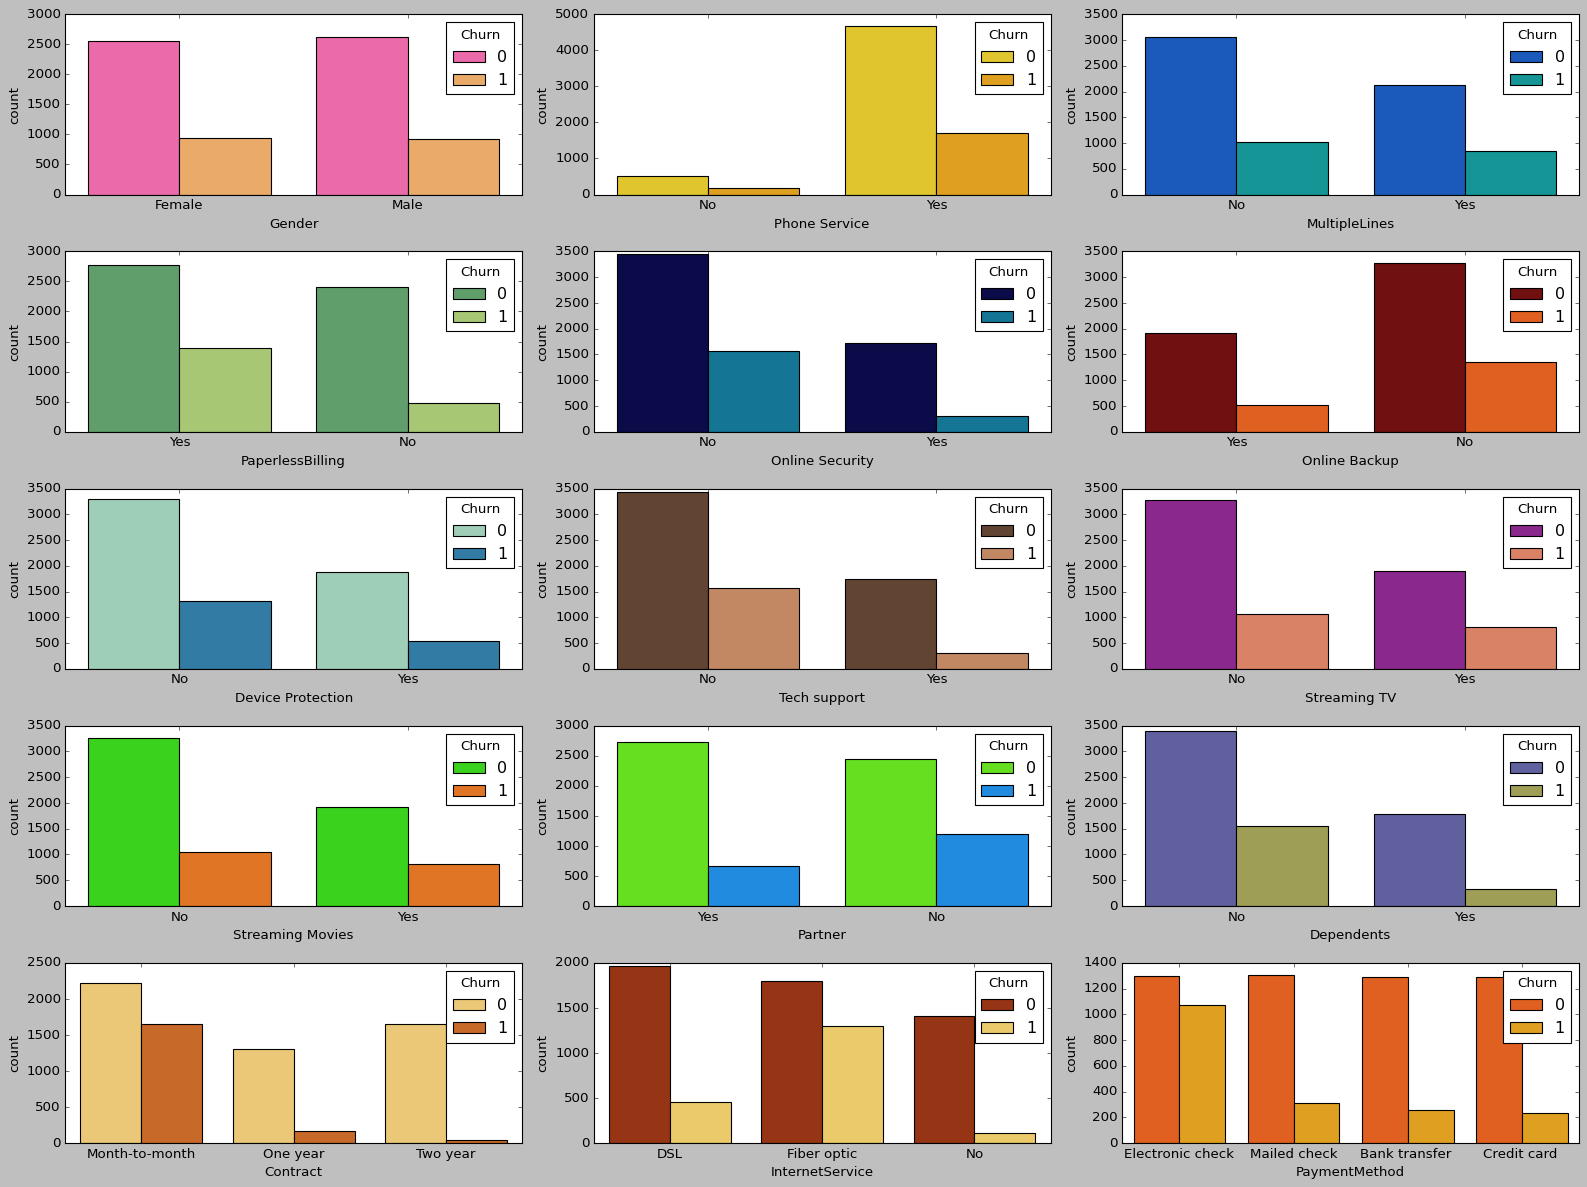

In [28]:
# Categorical Feature Visualization
fig, ax = plt.subplots(5, 3, figsize = (20, 15))

ax1 = sns.countplot(x='gender', data=df, hue='Churn', ax=ax[0, 0], palette='spring')
ax1.set(xlabel='Gender')
ax2 = sns.countplot(x='PhoneService', data=df, hue='Churn', ax=ax[0, 1], palette='Wistia')
ax2.set(xlabel='Phone Service')
ax3 = sns.countplot(x='MultipleLines', data=df, hue='Churn', ax=ax[0, 2], palette='winter')
ax3.set(xlabel='MultipleLines')
ax4 = sns.countplot(x='PaperlessBilling', data=df, hue='Churn', ax=ax[1, 0], palette='summer')
ax4.set(xlabel='PaperlessBilling')
ax5 = sns.countplot(x='OnlineSecurity', data=df, hue='Churn', ax=ax[1, 1], palette='ocean')
ax5.set(xlabel='Online Security')
ax6 = sns.countplot(x='OnlineBackup', data=df, hue='Churn', ax=ax[1, 2], palette='gist_heat')
ax6.set(xlabel='Online Backup')
ax7 = sns.countplot(x='DeviceProtection', data=df, hue='Churn', ax=ax[2, 0], palette='YlGnBu')
ax7.set(xlabel='Device Protection')
ax8 = sns.countplot(x='TechSupport', data=df, hue='Churn', ax=ax[2, 1], palette='copper')
ax8.set(xlabel='Tech support')
ax9 = sns.countplot(x='StreamingTV', data=df, hue='Churn', ax=ax[2, 2], palette='plasma')
ax9.set(xlabel='Streaming TV')
ax10 = sns.countplot(x='StreamingMovies', data=df, hue='Churn', ax=ax[3, 0], palette='gist_ncar')
ax10.set(xlabel='Streaming Movies')
ax11 = sns.countplot(x='Partner', data=df, hue='Churn', ax=ax[3, 1], palette='gist_rainbow')
ax11.set(xlabel='Partner')
ax12 = sns.countplot(x='Dependents', data=df, hue='Churn', ax=ax[3, 2], palette='gist_stern')
ax12.set(xlabel='Dependents')
ax13 = sns.countplot(x='Contract', data=df, hue='Churn', ax=ax[4, 0], palette='YlOrBr')
ax13.set(xlabel='Contract')
ax14 = sns.countplot(x='InternetService', data=df, hue='Churn', ax=ax[4, 1], palette='afmhot')
ax14.set(xlabel='InternetService')
ax15 = sns.countplot(x='PaymentMethod', data=df, hue='Churn', ax=ax[4, 2], palette='autumn')
ax15.set(xlabel='PaymentMethod')

plt.tight_layout()
plt.show()

# D. Categorical Encoding

> **Note:** Jenis-Jenis Tipe Data
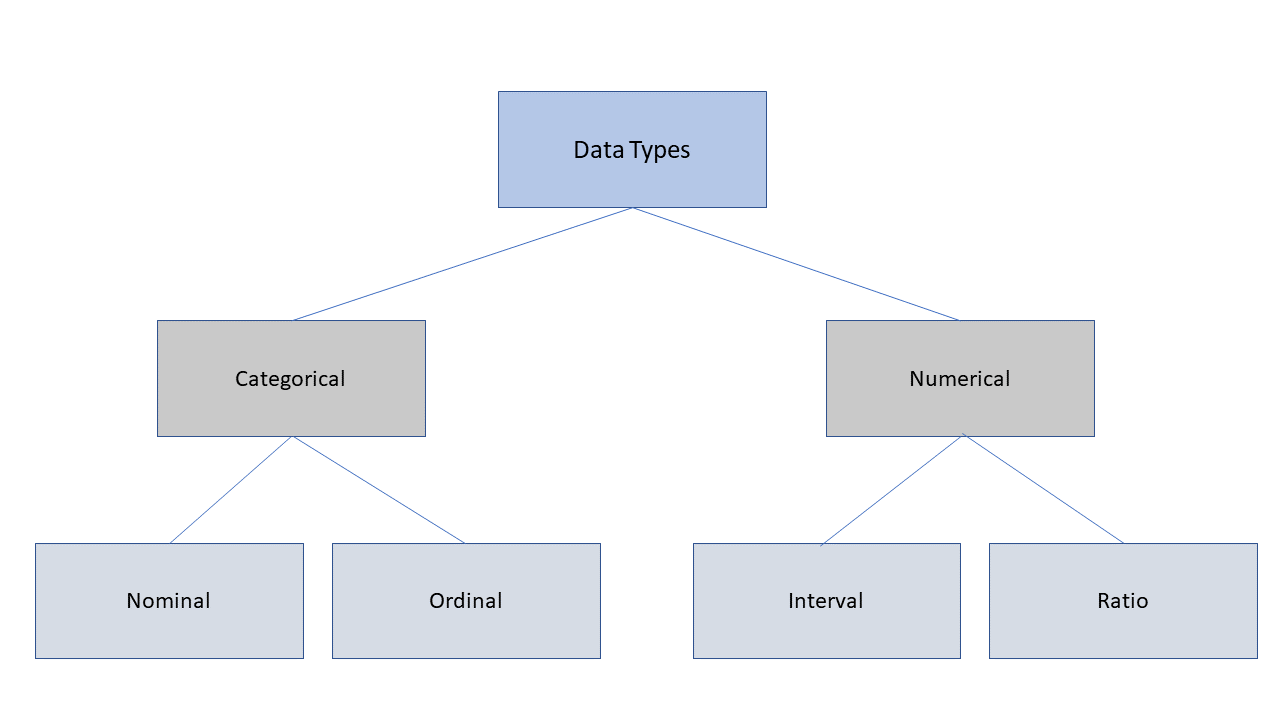

1. Data Nominal: Data nominal adalah data yang dapat diklasifikasikan ke dalam kategori atau label tanpa urutan tertentu. Contoh: jenis kelamin (Pria/Wanita), warna (Merah/Biru/Hijau), dll.
2. Data Ordinal: Data ordinal adalah data yang dapat diklasifikasikan ke dalam kategori atau label dengan urutan tertentu. Contoh: tingkat pendidikan (SD/SMP/SMA/Perguruan Tinggi), tingkat kesukaan (Sangat Tidak Suka/Tidak Suka/Netral/Suka/Sangat Suka), dll.
3. Data Interval: Data interval adalah data yang dapat diukur dalam skala yang tidak terbatas namun tidak memiliki nilai nol absolut. Contoh: suhu dalam derajat Fahrenheit, skala IQ, dll.
4. Data Rasio: Data rasio adalah data yang dapat diukur dalam skala yang tidak terbatas dan memiliki nilai nol absolut. Contoh: berat badan, tinggi badan, dll.

> **NOTE:**
> Perbedaan utama antara tipe data tersebut terletak pada cara data diukur dan diinterpretasikan. Data nominal hanya dapat di klasifikasikan, data ordinal memiliki urutan, data interval tidak memiliki nilai nol absolut, sementara data rasio memiliki nilai nol absolut sehingga dapat diukur perbandingannya.

1. Data kontinu: Data kontinu adalah data yang dapat diukur dalam skala yang tidak terbatas, seperti suhu, berat, tinggi, dll. Data ini dapat dinyatakan dalam bentuk angka decimal. Contoh : suhu tubuh, berat badan, tinggi badan, dll.
2. Data diskrit: Data diskrit adalah data yang dapat dihitung dan dinyatakan dalam bentuk angka bulat. Data diskrit dapat diklasifikasikan ke dalam kategori atau label. Contoh : jumlah anak, jenis kelamin, jenis pekerjaan, dll.
3. Data binari: Data binari adalah data yang hanya dapat memiliki dua nilai, yaitu 0 atau 1. Data ini sering digunakan dalam klasifikasi biner (binary classification), dimana setiap sampel diklasifikasikan sebagai kategori positif atau negatif. Contoh : status menikah (Menikah/Belum Menikah), status memiliki kartu kredit (ya/tidak), dll.

> **NOTE:**
> Perbedaan utama antara data kontinu, diskrit dan binari terletak pada cara data diukur dan diinterpretasikan. Data kontinu diukur dalam skala yang tidak terbatas, data diskrit diukur dalam skala yang terbatas dan dapat dihitung, sementara data binari hanya memiliki dua nilai yang mungkin.

* Dilihat dari isi value masing-masing fitur, maka encoding akan terbagi menjadi 2 yaitu: 
> 1. ***Ordinal Encoding*** untuk fitur kategorik tipe data ordinal.
> 2. ***One Hot Encoding*** untuk fitur kategorik tipe data nominal, interval, dan rasio.

In [29]:
# Untuk Uji Label Encoding
ordinal_data = ['Contract']
# Untuk Uji One Hot Encoding
nominal_data = df.select_dtypes(include="object").drop(columns=ordinal_data).columns.tolist()

print("Ordinal Data:")
pprint(ordinal_data)
print("\nNominal Data:")
pprint(nominal_data, compact=True)

Ordinal Data:
['Contract']

Nominal Data:
['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
 'PaperlessBilling', 'PaymentMethod']


## 2.1 Label Encoding

In [30]:
labelencoder = LabelEncoder()
df['Contract'] = labelencoder.fit_transform(df['Contract'])

le = pd.DataFrame(df)
display(le.head())

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,0,Yes,Electronic check,29.85,29.85,0
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,1,No,Mailed check,56.95,1889.50,0
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,0,Yes,Mailed check,53.85,108.15,1
3,Male,No,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,1,No,Bank transfer,42.30,1840.75,0
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,0,Yes,Electronic check,70.70,151.65,1


## 2.2 One Hot Encoding

In [31]:
# Creating one hot encoding with pandas get dummy
encoding = pd.get_dummies(le, nominal_data)
encoding.head()

,tenure,Contract,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,...,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer,PaymentMethod_Credit card,PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,29.85,29.85,0,1,0,1,0,0,...,1,0,1,0,0,1,0,0,1,0
1,34,1,56.95,1889.50,0,0,1,1,0,1,...,1,0,1,0,1,0,0,0,0,1
2,2,0,53.85,108.15,1,0,1,1,0,1,...,1,0,1,0,0,1,0,0,0,1
3,45,1,42.30,1840.75,0,0,1,1,0,1,...,1,0,1,0,1,0,1,0,0,0
4,2,0,70.70,151.65,1,1,0,1,0,1,...,1,0,1,0,0,1,0,0,1,0


In [32]:
encoding.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 38 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   tenure                          7043 non-null   int64  
 1   Contract                        7043 non-null   int64  
 2   MonthlyCharges                  7043 non-null   float64
 3   TotalCharges                    7043 non-null   float64
 4   Churn                           7043 non-null   int64  
 5   gender_Female                   7043 non-null   uint8  
 6   gender_Male                     7043 non-null   uint8  
 7   SeniorCitizen_No                7043 non-null   uint8  
 8   SeniorCitizen_Yes               7043 non-null   uint8  
 9   Partner_No                      7043 non-null   uint8  
 10  Partner_Yes                     7043 non-null   uint8  
 11  Dependents_No                   7043 non-null   uint8  
 12  Dependents_Yes                  70

In [33]:
enc_df = encoding.drop(['gender_Female', 'SeniorCitizen_No', 'Partner_No', 'Dependents_No', 
                        'PhoneService_No', 'MultipleLines_No', 'OnlineSecurity_No', 'OnlineBackup_No',
                        'DeviceProtection_No', 'TechSupport_No', 'StreamingTV_No', 'StreamingMovies_No',
                        'PaperlessBilling_No'], axis=1)
enc_df.head()

,tenure,Contract,MonthlyCharges,TotalCharges,Churn,gender_Male,SeniorCitizen_Yes,Partner_Yes,Dependents_Yes,PhoneService_Yes,...,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,PaperlessBilling_Yes,PaymentMethod_Bank transfer,PaymentMethod_Credit card,PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,29.85,29.85,0,0,0,1,0,0,...,1,0,0,0,0,1,0,0,1,0
1,34,1,56.95,1889.50,0,1,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1
2,2,0,53.85,108.15,1,1,0,0,0,1,...,1,0,0,0,0,1,0,0,0,1
3,45,1,42.30,1840.75,0,1,0,0,0,0,...,0,1,1,0,0,0,1,0,0,0
4,2,0,70.70,151.65,1,0,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0


In [34]:
enc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   tenure                          7043 non-null   int64  
 1   Contract                        7043 non-null   int64  
 2   MonthlyCharges                  7043 non-null   float64
 3   TotalCharges                    7043 non-null   float64
 4   Churn                           7043 non-null   int64  
 5   gender_Male                     7043 non-null   uint8  
 6   SeniorCitizen_Yes               7043 non-null   uint8  
 7   Partner_Yes                     7043 non-null   uint8  
 8   Dependents_Yes                  7043 non-null   uint8  
 9   PhoneService_Yes                7043 non-null   uint8  
 10  MultipleLines_Yes               7043 non-null   uint8  
 11  InternetService_DSL             7043 non-null   uint8  
 12  InternetService_Fiber optic     70

In [35]:
# enc_df.to_csv("df_encode.csv")

# E. Normalization
[Data Preproc](https://coderzcolumn.com/tutorials/machine-learning/scikit-learn-sklearn-data-preprocessing)

In [36]:
# Define variable X (Independent variable / features set)
X = enc_df.drop('Churn', axis=1)
# axis=0 specifies that rows should be dropped.
# axis=1 specifies that columns should be dropped.

# Define variable y (Dependent variable / target set)
Y = enc_df["Churn"]

In [37]:
scaler = StandardScaler()
normalisasi = pd.DataFrame(
                            scaler.fit_transform(X),
                            columns=X.columns
                          )

display(normalisasi.head())

,tenure,Contract,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_Yes,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,...,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,PaperlessBilling_Yes,PaymentMethod_Bank transfer,PaymentMethod_Credit card,PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,-1.277445,-0.828207,-1.160323,-0.994242,-1.009559,-0.439916,1.034530,-0.654012,-3.054010,-0.854176,...,1.378241,-0.723968,-0.639439,-0.790132,-0.79607,0.829798,-0.529885,-0.525047,1.406418,-0.544807
1,0.066327,0.371271,-0.259629,-0.173244,0.990532,-0.439916,-0.966622,-0.654012,0.327438,-0.854176,...,-0.725563,1.381277,-0.639439,-0.790132,-0.79607,-1.205113,-0.529885,-0.525047,-0.711026,1.835513
2,-1.236724,-0.828207,-0.362660,-0.959674,0.990532,-0.439916,-0.966622,-0.654012,0.327438,-0.854176,...,1.378241,-0.723968,-0.639439,-0.790132,-0.79607,0.829798,-0.529885,-0.525047,-0.711026,1.835513
3,0.514251,0.371271,-0.746535,-0.194766,0.990532,-0.439916,-0.966622,-0.654012,-3.054010,-0.854176,...,-0.725563,1.381277,1.563872,-0.790132,-0.79607,-1.205113,1.887201,-0.525047,-0.711026,-0.544807
4,-1.236724,-0.828207,0.197365,-0.940470,-1.009559,-0.439916,-0.966622,-0.654012,0.327438,-0.854176,...,-0.725563,-0.723968,-0.639439,-0.790132,-0.79607,0.829798,-0.529885,-0.525047,1.406418,-0.544807


Text(0.5, 1.0, 'After Scalling')

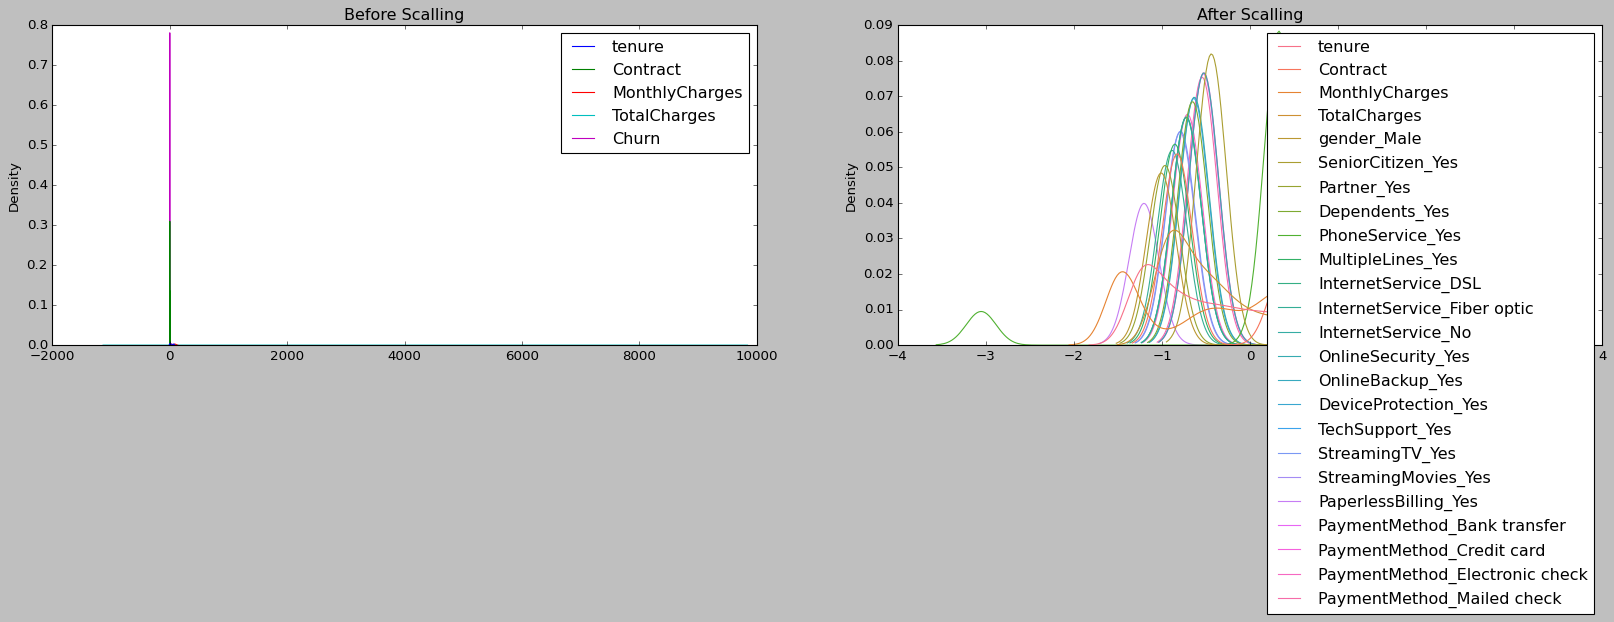

In [38]:
fig, (ax1, ax2)= plt.subplots(nrows=1, ncols=2, figsize = (25, 5))

sns.kdeplot(data=df, ax=ax1)
ax1.set_title('Before Scalling')

sns.kdeplot(data=normalisasi, ax=ax2)
ax2.set_title('After Scalling')

# F. SMOTE

In [39]:
# Define SMOTE Data Train
smote = SMOTE()
X_smote, Y_smote = smote.fit_resample(X, Y)

print('Original dataset shape is', Counter(Y))
print('Resample dataset shape is', Counter(Y_smote))
print("\n==========")
print(X_smote.shape)
print(Y_smote.shape)

print("\n********************")

Original dataset shape is Counter({0: 5174, 1: 1869})
Resample dataset shape is Counter({0: 5174, 1: 5174})

(10348, 24)
(10348,)

********************


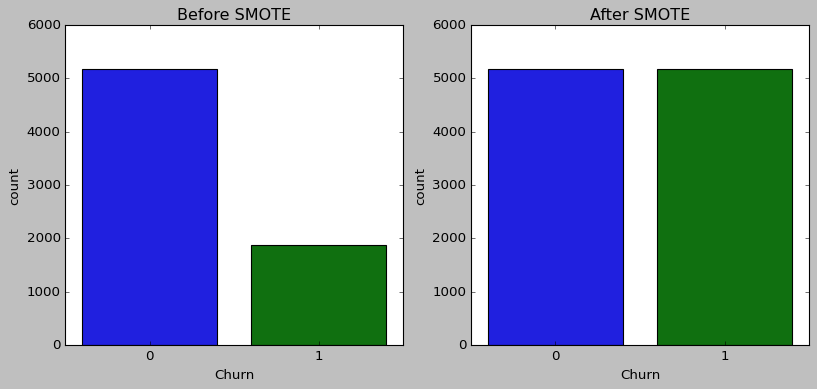

In [40]:
fig, axis = plt.subplots(1, 2, figsize=(12, 5))

for idx, label in enumerate([
    (Y, "Before SMOTE"), (Y_smote, "After SMOTE")
]):
    sns.countplot(x=label[0], ax=axis[idx])
    axis[idx].set_title(label[1])
    axis[idx].grid(False)
plt.show()

# G. Split Data

In [41]:
X_train, X_test, Y_train, Y_test = train_test_split(X_smote, Y_smote, test_size=0.2, random_state=42)
# The random_state=42 argument sets the random seed to 42, 
# so that the same random sample will be used each time the code is run.

* X_train: Untuk menampung data source yang akan dilatih.
* X_test: Untuk menampung data target yang akan dilatih.
* Y_train: Untuk menampung data source yang akan digunakan untuk testing.
* Y_test: Untuk menampung data target yang akan digunakan untuk testing.
<p>
* X_train: the training data for the feature set X
* X_test: the testing data for the feature set X
* Y_train: the training data for the target vector Y
* Y_test: the testing data for the target vector Y

In [42]:
print("Data Train:")
pprint(Y_train.value_counts())

print("\nData Test:")
pprint(Y_test.value_counts())

Data Train:
0    4153
1    4125
Name: Churn, dtype: int64

Data Test:
1    1049
0    1021
Name: Churn, dtype: int64


In [43]:
print("Jumlah data x_train yang digunakan adalah  : ", X_train.shape)
print("Jumlah data x_test yang digunakan adalah   : ", X_test.shape)
print("Jumlah data y_train yang digunakan adalah  : ", Y_train.shape)
print("Jumlah data y_test yang digunakan adalah   : ", Y_test.shape)

Jumlah data x_train yang digunakan adalah  :  (8278, 24)
Jumlah data x_test yang digunakan adalah   :  (2070, 24)
Jumlah data y_train yang digunakan adalah  :  (8278,)
Jumlah data y_test yang digunakan adalah   :  (2070,)


# H. Modelling
(Confusion Matrix)[https://github.com/scikit-learn/scikit-learn/issues/19513]

In [44]:
# Confusion Matrix
def classification_matrix (aktual, prediksi, name):
    cm = confusion_matrix(aktual, prediksi, labels=[0, 1])
    tp = cm[1][1] # actual 1, predict 1
    tn = cm[0][0] # actual 0, predict 0
    fp = cm[0][1] # actual 0, predict 1
    fn = cm[1][0] # actual 1, predict 0
    
    accuracy = round((tp + tn) / (tp + tn + fp + fn) * 100, 2)
    precision = round((tp) / (tp + fp) * 100, 2)
    recall = round((tp) / (tp + fn) * 100, 2)
    f1_score = round((2 * (precision * recall) / (precision + recall)))
    
    print('Evaluation Model:', name)
    print(cm)
    print('Accuracy   :', accuracy, '%')
    print('Precision  :', precision, '%')
    print('Recall     :', recall, '%')
    print('F1_Score   :', f1_score, '%')

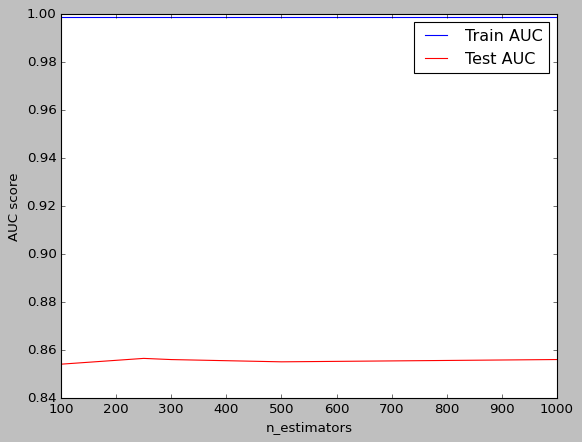

In [45]:
n_estimators = [100, 250, 300, 500, 1000]
train_results = []
test_results = []

for estimator in n_estimators:
   entropy_rf = RandomForestClassifier(criterion='entropy', random_state=0, n_estimators=estimator, n_jobs=-1)
   entropy_rf.fit(X_train, Y_train)
   
   x_pred_entropy = entropy_rf.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_train, x_pred_entropy)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)

   y_pred_entropy = entropy_rf.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, y_pred_entropy)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)

from matplotlib.legend_handler import HandlerLine2D

line1, = plt.plot(n_estimators, train_results, "b", label="Train AUC")
line2, = plt.plot(n_estimators, test_results, "r", label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC score")
plt.xlabel("n_estimators")
plt.show()

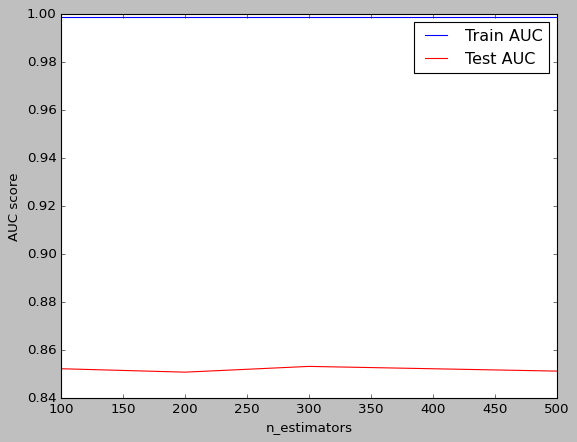

In [46]:
n_estimators = [100, 200, 300, 500]
train_results = []
test_results = []

for estimator in n_estimators:
   gini_rf = RandomForestClassifier(criterion='gini', random_state=0, n_estimators=estimator, n_jobs=-1)
   gini_rf.fit(X_train, Y_train)
   
   x_pred_gini = gini_rf.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_train, x_pred_gini)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)

   y_pred_gini = gini_rf.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, y_pred_gini)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)

from matplotlib.legend_handler import HandlerLine2D

line1, = plt.plot(n_estimators, train_results, "b", label="Train AUC")
line2, = plt.plot(n_estimators, test_results, "r", label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC score")
plt.xlabel("n_estimators")
plt.show()

### 7.1.1 Random Forest
* [Tree](https://stackabuse.com/random-forest-algorithm-with-python-and-scikit-learn/)
* [Predict Data](https://data36.com/random-forest-in-python/)

#### a. Entropy = 85,12%

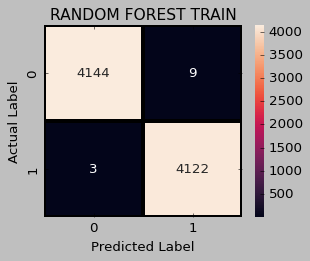


**********



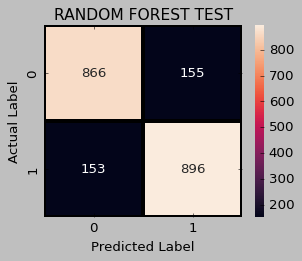


**********

Training Accuracy	: 99.86
Testing Accuracy	: 85.12

**********

Jumlah data prediksi benar :  1762  data
Jumlah data prediksi salah :  308  data

**********



,Actual,Predict
9428,1,1
4593,0,0
5379,0,0
8918,1,1
6448,1,1


In [47]:
model_rfc = RandomForestClassifier(n_estimators=100, criterion='entropy')
model_rfc.fit(X_train, Y_train)

pred_train_rfc = model_rfc.predict(X_train)
pred_test_rfc = model_rfc.predict(X_test)

# CONFUSION MATRIX DATA TRAIN
plt.figure(figsize=(4, 3))
sns.heatmap(
            confusion_matrix(Y_train, pred_train_rfc),
            annot=True,
            fmt="d",
            linecolor="k",
            linewidths=3
           )
    
plt.title("RANDOM FOREST TRAIN", fontsize=14)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

print("\n**********\n")

# CONFUSION MATRIX DATA TEST
plt.figure(figsize=(4, 3))
sns.heatmap(
            confusion_matrix(Y_test, pred_test_rfc),
            annot=True,
            fmt="d",
            linecolor="k",
            linewidths=3
           )
    
plt.title("RANDOM FOREST TEST", fontsize=14)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

print("\n**********\n")

# Check accuracy score 
print("Training Accuracy\t: {0:.2f}".format(model_rfc.score(X_train, Y_train) * 100))
print("Testing Accuracy\t: {0:.2f}".format(model_rfc.score(X_test, Y_test) * 100))

print("\n**********\n")

#Compute performance manually
prediksiBenar = (pred_test_rfc == Y_test).sum()
prediksiSalah = (pred_test_rfc != Y_test).sum()
 
print("Jumlah data prediksi benar : ", prediksiBenar, " data")
print("Jumlah data prediksi salah : ", prediksiSalah, " data")

print("\n**********\n")

# Membuat dataframe baru untuk membandingkan data test dengan data prediksi
data = pd.DataFrame({'Actual': Y_test, 'Predict': pred_test_rfc})
data.head()

In [48]:
classification_matrix(Y_train, pred_train_rfc, 'Random Forest Training')

Evaluation Model: Random Forest Training
[[4144    9]
 [   3 4122]]
Accuracy   : 99.86 %
Precision  : 99.78 %
Recall     : 99.93 %
F1_Score   : 100 %


In [49]:
print(metrics.classification_report(Y_train, pred_train_rfc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4153
           1       1.00      1.00      1.00      4125

    accuracy                           1.00      8278
   macro avg       1.00      1.00      1.00      8278
weighted avg       1.00      1.00      1.00      8278



In [50]:
classification_matrix(Y_test, pred_test_rfc, 'Random Forest Testing')

Evaluation Model: Random Forest Testing
[[866 155]
 [153 896]]
Accuracy   : 85.12 %
Precision  : 85.25 %
Recall     : 85.41 %
F1_Score   : 85 %


In [51]:
print(metrics.classification_report(Y_test, pred_test_rfc))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85      1021
           1       0.85      0.85      0.85      1049

    accuracy                           0.85      2070
   macro avg       0.85      0.85      0.85      2070
weighted avg       0.85      0.85      0.85      2070



In [52]:
# view the feature scores
feature_scores = pd.Series(model_rfc.feature_importances_, 
                           index=X_train.columns
                          ).sort_values(ascending=False)
feature_scores

MonthlyCharges                    0.151309
TotalCharges                      0.149725
tenure                            0.128367
Contract                          0.113971
OnlineSecurity_Yes                0.036641
InternetService_No                0.033363
TechSupport_Yes                   0.031406
InternetService_Fiber optic       0.028821
Dependents_Yes                    0.026298
PaymentMethod_Bank transfer       0.025538
Partner_Yes                       0.025301
PaymentMethod_Credit card         0.025253
gender_Male                       0.023432
OnlineBackup_Yes                  0.023269
PaymentMethod_Electronic check    0.023061
InternetService_DSL               0.022144
PaperlessBilling_Yes              0.021121
PaymentMethod_Mailed check        0.020844
DeviceProtection_Yes              0.017762
MultipleLines_Yes                 0.017056
StreamingMovies_Yes               0.016368
SeniorCitizen_Yes                 0.015706
StreamingTV_Yes                   0.014574
PhoneServic

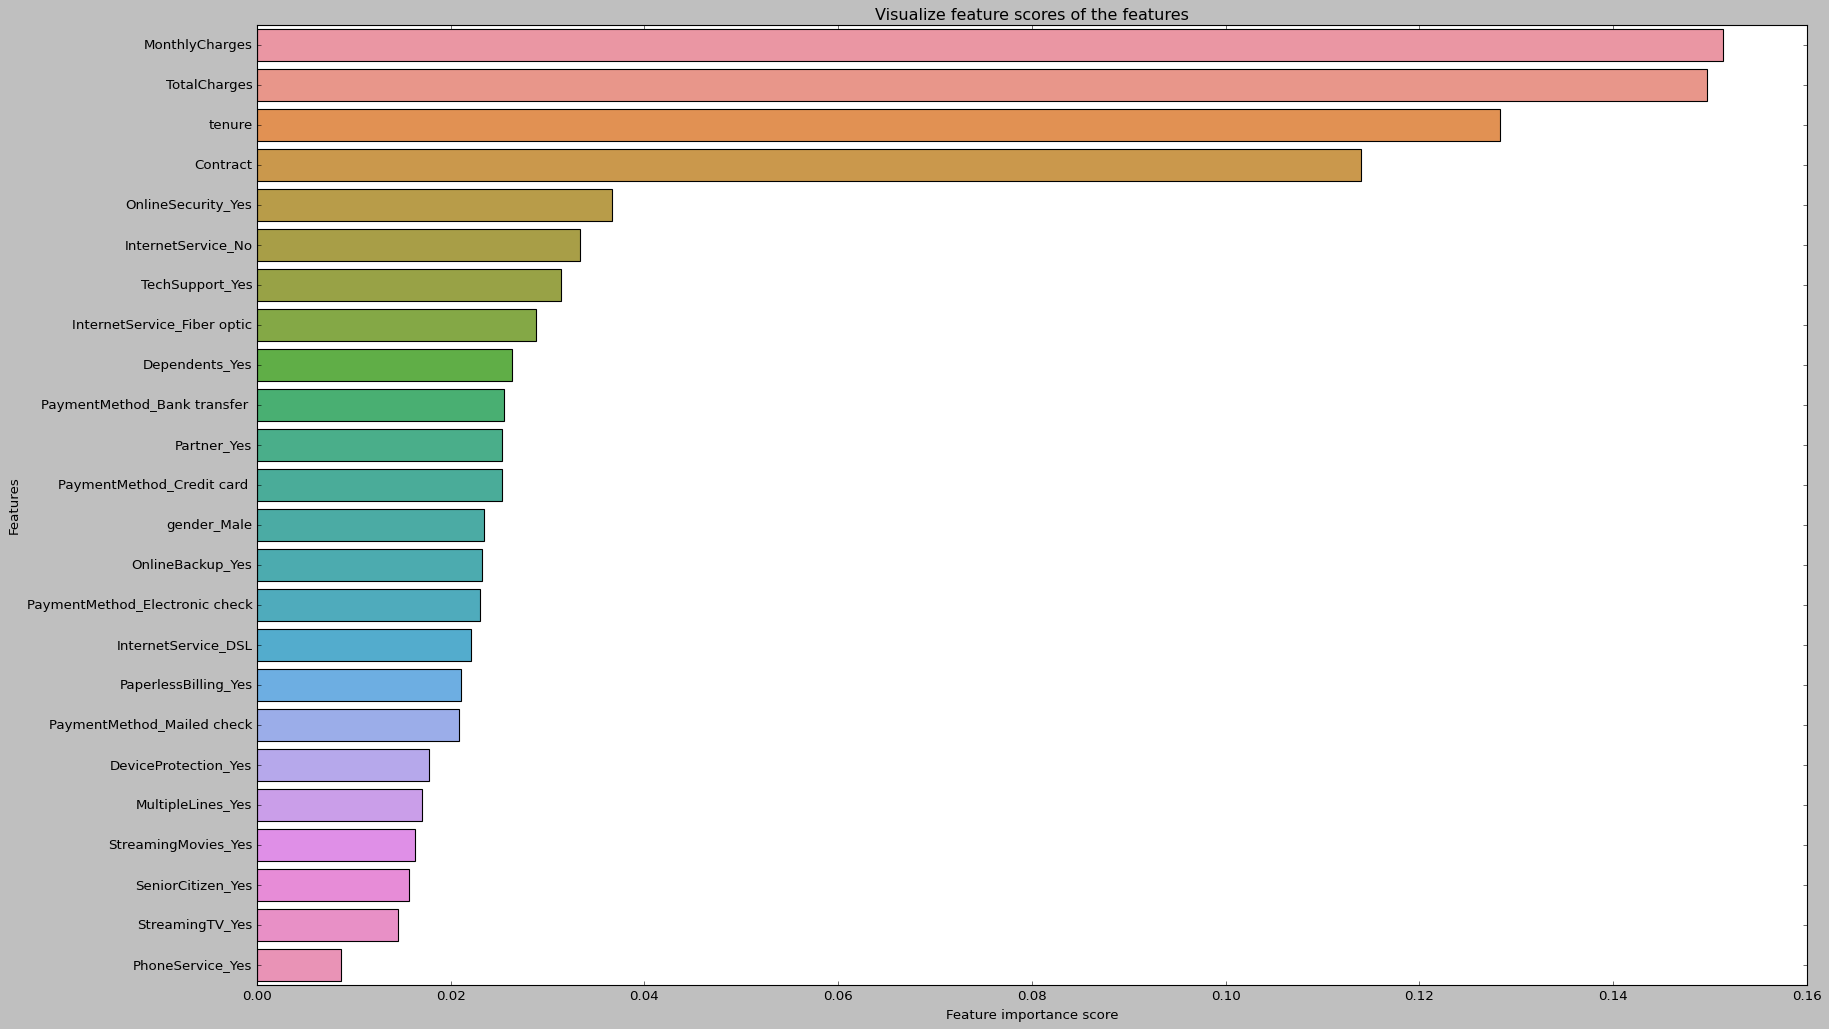

In [53]:
# Creating a seaborn bar plot
fig, ax = plt.subplots(figsize=(25, 15))
ax = sns.barplot(x=feature_scores, y=feature_scores.index)
ax.set_title("Visualize feature scores of the features")
ax.set_yticklabels(feature_scores.index)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()

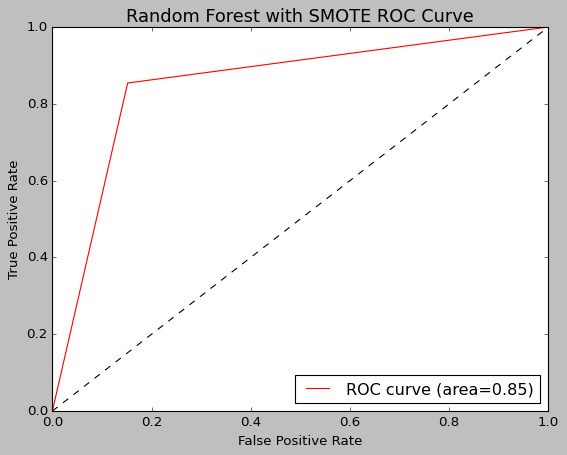

In [54]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, pred_test_rfc)
auc_score = metrics.roc_auc_score(Y_test, pred_test_rfc)

plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(false_positive_rate, true_positive_rate, color = "r", label='ROC curve (area=%0.2f)' % auc_score)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest with SMOTE ROC Curve', fontsize=16)
plt.legend(loc="lower right")
plt.show();

#### b. Gini = 85,31%

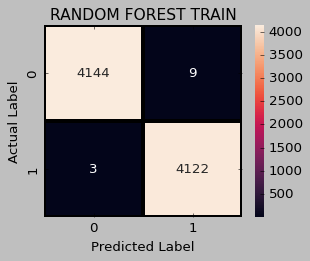


**********



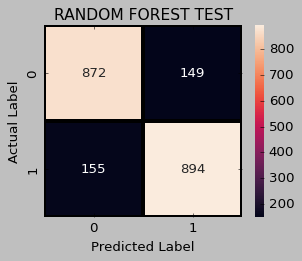


**********

Training Accuracy	: 99.8550
Testing Accuracy	: 85.3140

**********

Jumlah data prediksi benar :  1766  data
Jumlah data prediksi salah :  304  data

**********



,Actual,Predict
9428,1,1
4593,0,0
5379,0,0
8918,1,1
6448,1,1


In [55]:
model_rfc = RandomForestClassifier(n_estimators=200, criterion='gini')
model_rfc.fit(X_train, Y_train)

pred_train_rfc = model_rfc.predict(X_train)
pred_test_rfc = model_rfc.predict(X_test)

# CONFUSION MATRIX DATA TRAIN
plt.figure(figsize=(4, 3))
sns.heatmap(
            confusion_matrix(Y_train, pred_train_rfc),
            annot=True,
            fmt="d",
            linecolor="k",
            linewidths=3
           )
    
plt.title("RANDOM FOREST TRAIN", fontsize=14)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

print("\n**********\n")

# CONFUSION MATRIX DATA TEST
plt.figure(figsize=(4, 3))
sns.heatmap(
            confusion_matrix(Y_test, pred_test_rfc),
            annot=True,
            fmt="d",
            linecolor="k",
            linewidths=3
           )
    
plt.title("RANDOM FOREST TEST", fontsize=14)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

print("\n**********\n")

# Check accuracy score 
print("Training Accuracy\t: {0:.4f}".format(model_rfc.score(X_train, Y_train) * 100))
print("Testing Accuracy\t: {0:.4f}".format(model_rfc.score(X_test, Y_test) * 100))

print("\n**********\n")

#Compute performance manually
prediksiBenar = (pred_test_rfc == Y_test).sum()
prediksiSalah = (pred_test_rfc != Y_test).sum()
 
print("Jumlah data prediksi benar : ", prediksiBenar, " data")
print("Jumlah data prediksi salah : ", prediksiSalah, " data")

print("\n**********\n")

# Membuat dataframe baru untuk membandingkan data test dengan data prediksi
data = pd.DataFrame({'Actual': Y_test, 'Predict': pred_test_rfc})
data.head()

In [56]:
classification_matrix(Y_train, pred_train_rfc, 'Random Forest Training')

Evaluation Model: Random Forest Training
[[4144    9]
 [   3 4122]]
Accuracy   : 99.86 %
Precision  : 99.78 %
Recall     : 99.93 %
F1_Score   : 100 %


In [57]:
print(metrics.classification_report(Y_train, pred_train_rfc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4153
           1       1.00      1.00      1.00      4125

    accuracy                           1.00      8278
   macro avg       1.00      1.00      1.00      8278
weighted avg       1.00      1.00      1.00      8278



In [58]:
classification_matrix(Y_test, pred_test_rfc, 'Random Forest Testing')

Evaluation Model: Random Forest Testing
[[872 149]
 [155 894]]
Accuracy   : 85.31 %
Precision  : 85.71 %
Recall     : 85.22 %
F1_Score   : 85 %


In [59]:
print(metrics.classification_report(Y_test, pred_test_rfc))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85      1021
           1       0.86      0.85      0.85      1049

    accuracy                           0.85      2070
   macro avg       0.85      0.85      0.85      2070
weighted avg       0.85      0.85      0.85      2070



In [60]:
# view the feature scores
feature_scores = pd.Series(model_rfc.feature_importances_, 
                           index=X_train.columns
                          ).sort_values(ascending=False)
feature_scores

MonthlyCharges                    0.143252
TotalCharges                      0.138980
tenure                            0.130843
Contract                          0.118563
OnlineSecurity_Yes                0.044279
TechSupport_Yes                   0.038313
InternetService_Fiber optic       0.036832
InternetService_No                0.033782
Partner_Yes                       0.029671
PaymentMethod_Credit card         0.027890
Dependents_Yes                    0.027463
PaymentMethod_Bank transfer       0.025487
OnlineBackup_Yes                  0.023103
gender_Male                       0.021393
PaymentMethod_Mailed check        0.020493
InternetService_DSL               0.019725
PaperlessBilling_Yes              0.018407
DeviceProtection_Yes              0.018194
PaymentMethod_Electronic check    0.018035
MultipleLines_Yes                 0.014580
SeniorCitizen_Yes                 0.014104
StreamingMovies_Yes               0.014057
StreamingTV_Yes                   0.013152
PhoneServic

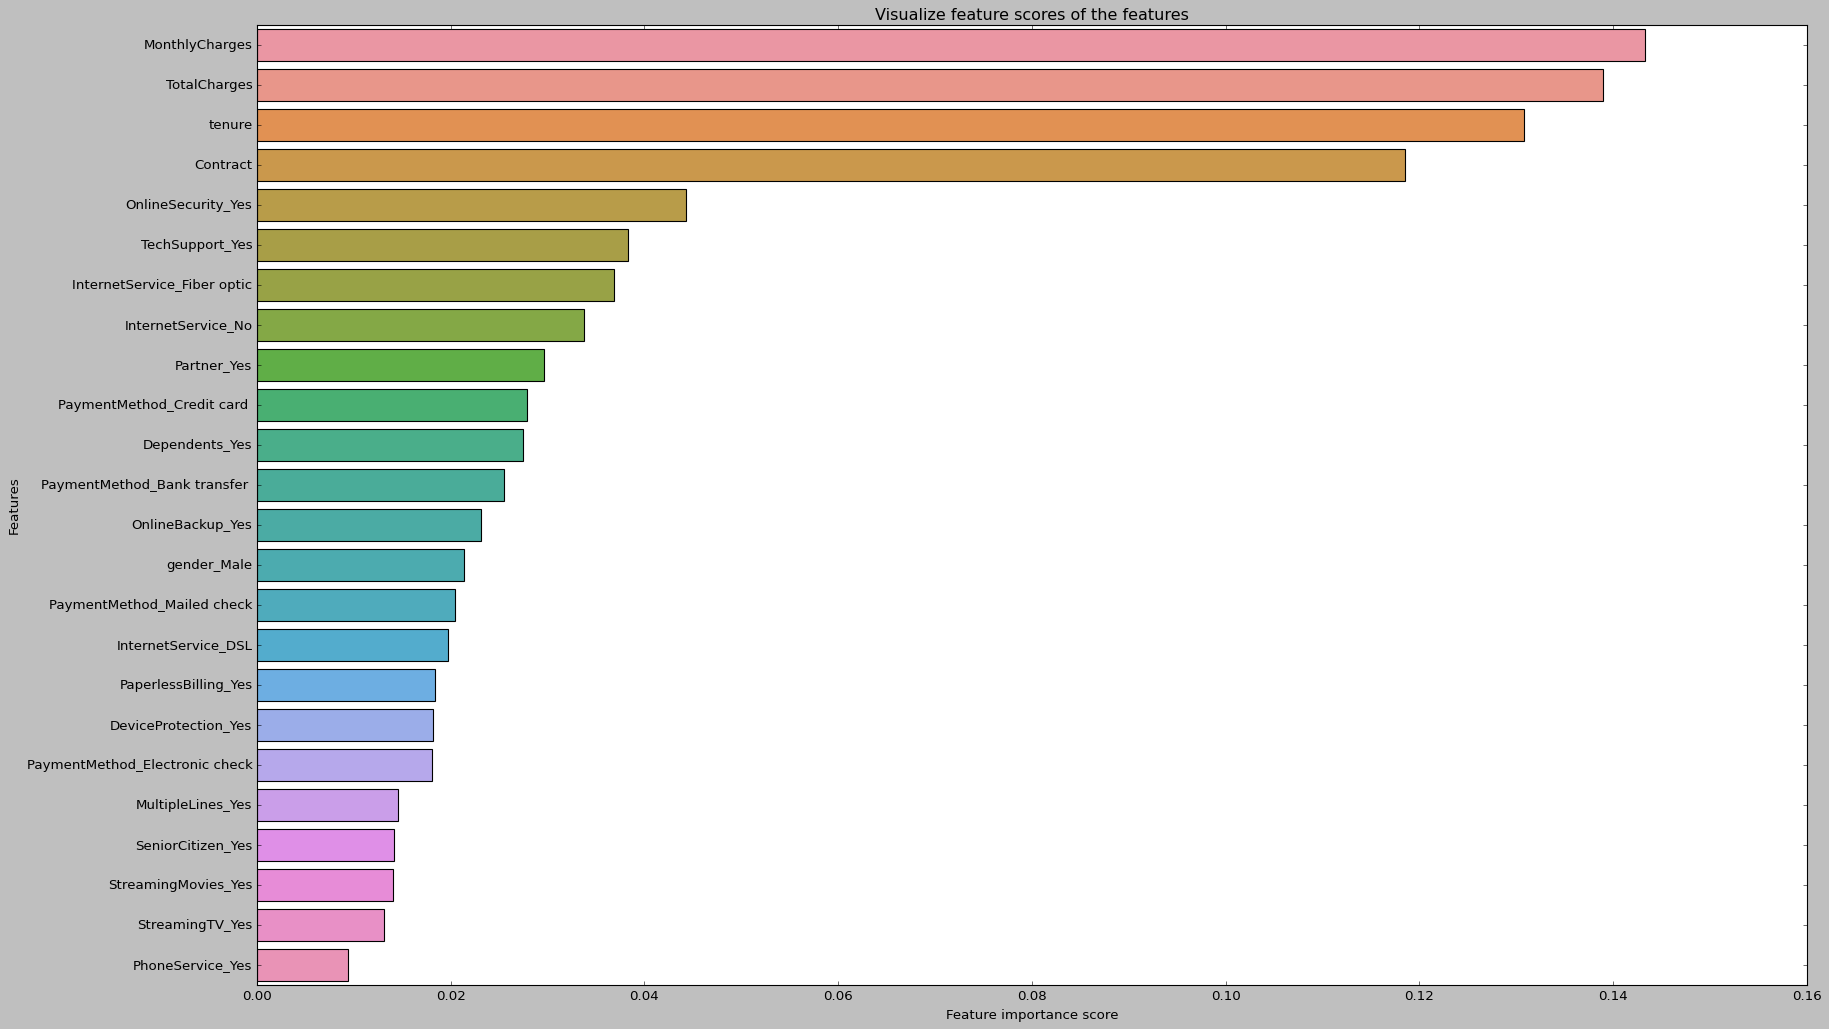

In [61]:
# Creating a seaborn bar plot
fig, ax = plt.subplots(figsize=(25, 15))
ax = sns.barplot(x=feature_scores, y=feature_scores.index)
ax.set_title("Visualize feature scores of the features")
ax.set_yticklabels(feature_scores.index)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()

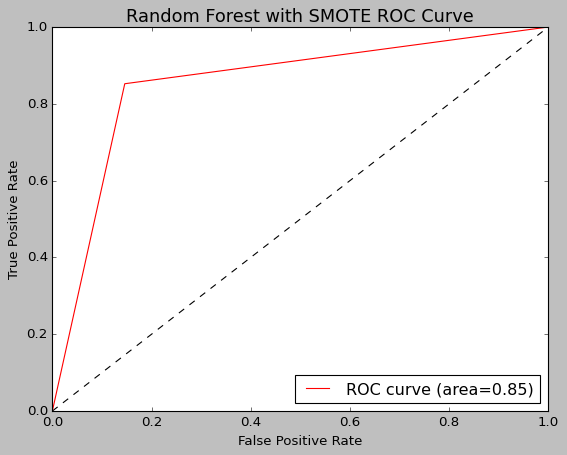

In [62]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, pred_test_rfc)
auc_score = metrics.roc_auc_score(Y_test, pred_test_rfc)

plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(false_positive_rate, true_positive_rate, color = "r", label='ROC curve (area=%0.2f)' % auc_score)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest with SMOTE ROC Curve', fontsize=16)
plt.legend(loc="lower right")
plt.show();

### 7.1.2 Gaussian Naive Bayes = 81,30%

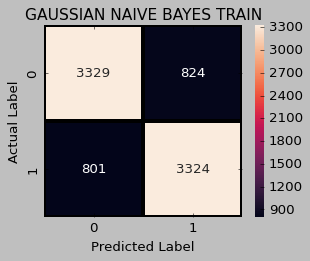


**********



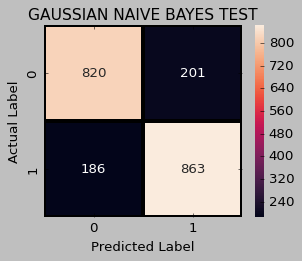


**********

Training Accuracy	: 80.3697
Testing Accuracy	: 81.3043

**********

Jumlah data prediksi benar :  1683  data
Jumlah data prediksi salah :  387  data

**********



,Actual,Predict
9428,1,1
4593,0,0
5379,0,0
8918,1,1
6448,1,0


In [63]:
# Mendefinisikan model Naive Bayes
model_gnb = GaussianNB()  
  
# Training the model on the training dataset
# Fit() function is used to train the model using the training sets as parameters
model_gnb.fit(X_train, Y_train)
  
# Performing predictions on the test dataset
pred_train_gnb = model_gnb.predict(X_train)
pred_test_gnb = model_gnb.predict(X_test)

# CONFUSION MATRIX DATA TRAIN
plt.figure(figsize=(4, 3))
sns.heatmap(
            confusion_matrix(Y_train, pred_train_gnb),
            annot=True,
            fmt="d",
            linecolor="k",
            linewidths=3
           )
    
plt.title("GAUSSIAN NAIVE BAYES TRAIN", fontsize=14)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

print("\n**********\n")

# CONFUSION MATRIX DATA TEST
plt.figure(figsize=(4, 3))
sns.heatmap(
            confusion_matrix(Y_test, pred_test_gnb),
            annot=True,
            fmt="d",
            linecolor="k",
            linewidths=3
           )
    
plt.title("GAUSSIAN NAIVE BAYES TEST", fontsize=14)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

print("\n**********\n")

# Check accuracy score 
print("Training Accuracy\t: {0:.4f}".format(model_gnb.score(X_train, Y_train) * 100))
print("Testing Accuracy\t: {0:.4f}".format(model_gnb.score(X_test, Y_test) * 100))

print("\n**********\n")

#Compute performance manually
prediksiBenar = (pred_test_gnb == Y_test).sum()
prediksiSalah = (pred_test_gnb != Y_test).sum()
 
print("Jumlah data prediksi benar : ", prediksiBenar, " data")
print("Jumlah data prediksi salah : ", prediksiSalah, " data")

print("\n**********\n")

# Membuat dataframe baru untuk membandingkan data test dengan data prediksi
data = pd.DataFrame({'Actual': Y_test, 'Predict': pred_test_gnb})
data.head()

In [64]:
classification_matrix(Y_train, pred_train_gnb, 'GAUSSIAN NAIVE BAYES TRAIN')

Evaluation Model: GAUSSIAN NAIVE BAYES TRAIN
[[3329  824]
 [ 801 3324]]
Accuracy   : 80.37 %
Precision  : 80.14 %
Recall     : 80.58 %
F1_Score   : 80 %


In [65]:
print(metrics.classification_report(Y_train, pred_train_gnb))

              precision    recall  f1-score   support

           0       0.81      0.80      0.80      4153
           1       0.80      0.81      0.80      4125

    accuracy                           0.80      8278
   macro avg       0.80      0.80      0.80      8278
weighted avg       0.80      0.80      0.80      8278



In [66]:
classification_matrix(Y_test, pred_test_gnb, 'GAUSSIAN NAIVE BAYES TEST')

Evaluation Model: GAUSSIAN NAIVE BAYES TEST
[[820 201]
 [186 863]]
Accuracy   : 81.3 %
Precision  : 81.11 %
Recall     : 82.27 %
F1_Score   : 82 %


In [67]:
print(metrics.classification_report(Y_test, pred_test_gnb))

              precision    recall  f1-score   support

           0       0.82      0.80      0.81      1021
           1       0.81      0.82      0.82      1049

    accuracy                           0.81      2070
   macro avg       0.81      0.81      0.81      2070
weighted avg       0.81      0.81      0.81      2070



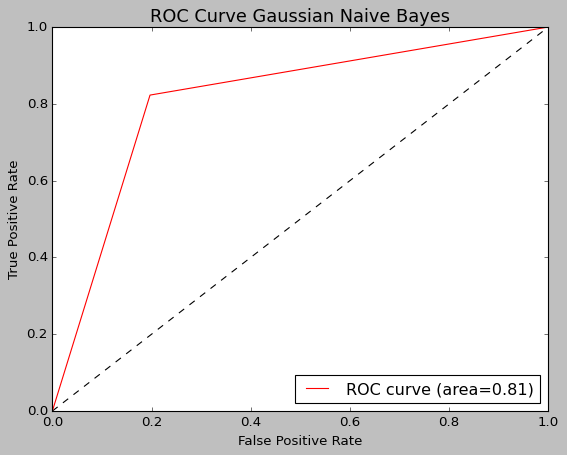

In [68]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, pred_test_gnb)
auc_score = metrics.roc_auc_score(Y_test, pred_test_gnb)

plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(false_positive_rate, true_positive_rate, color = "r", label='ROC curve (area=%0.2f)' % auc_score)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Gaussian Naive Bayes', fontsize=16)
plt.legend(loc="lower right")
plt.show();

### 7.1.3 Bernoulli Naive Bayes = 81,30%

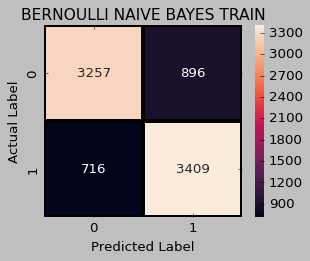


**********



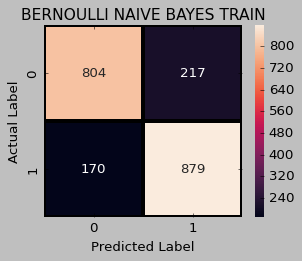


**********

Training Accuracy	: 80.53
Testing Accuracy	: 81.30

**********

Jumlah data prediksi benar :  1683  data
Jumlah data prediksi salah :  387  data

**********



,Actual,Predict
9428,1,1
4593,0,0
5379,0,0
8918,1,1
6448,1,0


In [69]:
# Mendefinisikan model Naive Bayes
model_bnb = BernoulliNB()  
  
# Training the model on the training dataset
# Fit() function is used to train the model using the training sets as parameters
model_bnb.fit(X_train, Y_train)
  
# Performing predictions on the test dataset
pred_train_bnb = model_bnb.predict(X_train)
pred_test_bnb = model_bnb.predict(X_test)

# CONFUSION MATRIX DATA TRAIN
plt.figure(figsize=(4, 3))
sns.heatmap(
            confusion_matrix(Y_train, pred_train_bnb),
            annot=True,
            fmt="d",
            linecolor="k",
            linewidths=3
           )
    
plt.title("BERNOULLI NAIVE BAYES TRAIN", fontsize=14)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

print("\n**********\n")

# CONFUSION MATRIX DATA TEST
plt.figure(figsize=(4, 3))
sns.heatmap(
            confusion_matrix(Y_test, pred_test_bnb),
            annot=True,
            fmt="d",
            linecolor="k",
            linewidths=3
           )
    
plt.title("BERNOULLI NAIVE BAYES TRAIN", fontsize=14)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

print("\n**********\n")

# Check accuracy score 
print("Training Accuracy\t: {0:.2f}".format(model_bnb.score(X_train, Y_train) * 100))
print("Testing Accuracy\t: {0:.2f}".format(model_bnb.score(X_test, Y_test) * 100))

print("\n**********\n")

#Compute performance manually
prediksiBenar = (pred_test_bnb == Y_test).sum()
prediksiSalah = (pred_test_bnb != Y_test).sum()
 
print("Jumlah data prediksi benar : ", prediksiBenar, " data")
print("Jumlah data prediksi salah : ", prediksiSalah, " data")

print("\n**********\n")

# Membuat dataframe baru untuk membandingkan data test dengan data prediksi
data = pd.DataFrame({'Actual': Y_test, 'Predict': pred_test_bnb})
data.head()

In [70]:
classification_matrix(Y_train, pred_train_bnb, 'BERNOULLI NAIVE BAYES TRAIN')

Evaluation Model: BERNOULLI NAIVE BAYES TRAIN
[[3257  896]
 [ 716 3409]]
Accuracy   : 80.53 %
Precision  : 79.19 %
Recall     : 82.64 %
F1_Score   : 81 %


In [71]:
print(metrics.classification_report(Y_train, pred_train_bnb))

              precision    recall  f1-score   support

           0       0.82      0.78      0.80      4153
           1       0.79      0.83      0.81      4125

    accuracy                           0.81      8278
   macro avg       0.81      0.81      0.81      8278
weighted avg       0.81      0.81      0.81      8278



In [72]:
classification_matrix(Y_test, pred_test_bnb, 'BERNOULLI NAIVE BAYES TEST')

Evaluation Model: BERNOULLI NAIVE BAYES TEST
[[804 217]
 [170 879]]
Accuracy   : 81.3 %
Precision  : 80.2 %
Recall     : 83.79 %
F1_Score   : 82 %


In [73]:
print(metrics.classification_report(Y_test, pred_test_bnb))

              precision    recall  f1-score   support

           0       0.83      0.79      0.81      1021
           1       0.80      0.84      0.82      1049

    accuracy                           0.81      2070
   macro avg       0.81      0.81      0.81      2070
weighted avg       0.81      0.81      0.81      2070



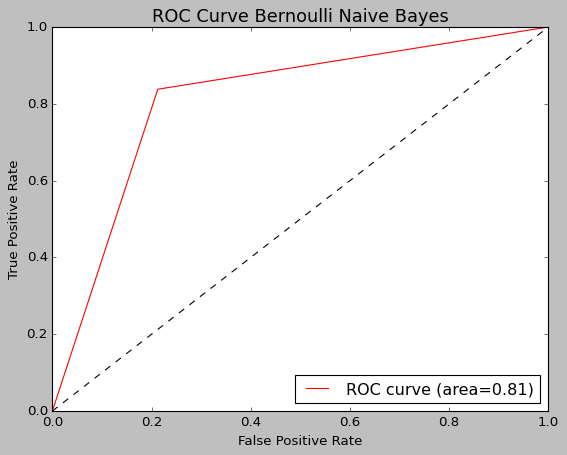

In [74]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, pred_test_bnb)
auc_score = metrics.roc_auc_score(Y_test, pred_test_bnb)

plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(false_positive_rate, true_positive_rate, color = "r", label='ROC curve (area=%0.2f)' % auc_score)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Bernoulli Naive Bayes', fontsize=16)
plt.legend(loc="lower right")
plt.show();

### 7.1.4 Prediksi Data

In [75]:
X_test.head()

,tenure,Contract,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_Yes,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,...,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,PaperlessBilling_Yes,PaymentMethod_Bank transfer,PaymentMethod_Credit card,PaymentMethod_Electronic check,PaymentMethod_Mailed check
9428,12,0,45.310072,519.313669,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4593,11,0,20.300000,246.300000,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
5379,56,1,98.000000,5270.600000,0,0,1,0,1,1,...,0,0,0,1,1,1,0,0,1,0
8918,9,0,45.311147,417.964786,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
6448,58,1,104.650000,6219.600000,1,0,0,0,1,1,...,0,1,1,1,1,1,0,0,1,0


In [76]:
X_test.iloc[0:2].T

,9428,4593
tenure,12.000000,11.0
Contract,0.000000,0.0
MonthlyCharges,45.310072,20.3
TotalCharges,519.313669,246.3
gender_Male,1.000000,0.0
SeniorCitizen_Yes,0.000000,0.0
Partner_Yes,0.000000,0.0
Dependents_Yes,0.000000,0.0
PhoneService_Yes,0.000000,1.0
MultipleLines_Yes,0.000000,0.0


#### a. Random Forest

In [77]:
# Pembuktian prediksi X test pada index 0
test1 = [[0, 0, 0, 0.213595, 1, 0, 0, 0.182990, 1, 0, 1, 0, 0, 0.817010, 0.658286, 0.147133, 1, 0, 1, 0, 0, 0, 1, 0]]
model_rfc.predict(test1)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0])

In [78]:
# Pembuktian rediksi X test pada index 1
test2 = [[0, 0, 0, 0.152778, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.020398, 0.026252, 0, 0, 0, 1, 1, 0, 0, 0]]
model_rfc.predict(test2)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1])

In [79]:
pred_test_rfc[:5]

array([1, 0, 0, 1, 1])

In [80]:
y_pred = []

for element in pred_test_rfc:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [81]:
Y_test[:10]

9428    1
4593    0
5379    0
8918    1
6448    1
6060    0
850     0
713     0
8661    1
4438    0
Name: Churn, dtype: int64

In [82]:
y_pred[:10]

[1, 0, 0, 1, 1, 1, 0, 1, 1, 0]

#### b. Gaussian Naive Bayes

In [83]:
# Pembuktian prediksi X test pada index 0
test1 = [[0, 0, 0, 0.213595, 1, 0, 0, 0.182990, 1, 0, 1, 0, 0, 0.817010, 0.658286, 0.147133, 1, 0, 1, 0, 0, 0, 1, 0]]
model_gnb.predict(test1)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


array([0])

In [84]:
# Pembuktian rediksi X test pada index 1
test2 = [[0, 0, 0, 0.152778, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.020398, 0.026252, 0, 0, 0, 1, 1, 0, 0, 0]]
model_gnb.predict(test2)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


array([1])

In [85]:
pred_test_gnb[:5]

array([1, 0, 0, 1, 0])

In [86]:
y_pred = []

for element in pred_test_gnb:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [87]:
Y_test[:10]

9428    1
4593    0
5379    0
8918    1
6448    1
6060    0
850     0
713     0
8661    1
4438    0
Name: Churn, dtype: int64

In [88]:
y_pred[:10]

[1, 0, 0, 1, 0, 1, 0, 0, 1, 0]

#### c. Bernoulli Naive Bayes

In [89]:
# Pembuktian prediksi X test pada index 0
test1 = [[0, 0, 0, 0.213595, 1, 0, 0, 0.182990, 1, 0, 1, 0, 0, 0.817010, 0.658286, 0.147133, 1, 0, 1, 0, 0, 0, 1, 0]]
model_bnb.predict(test1)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but BernoulliNB was fitted with feature names
  warnings.warn(


array([0])

In [90]:
# Pembuktian rediksi X test pada index 1
test2 = [[0, 0, 0, 0.152778, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.020398, 0.026252, 0, 0, 0, 1, 1, 0, 0, 0]]
model_bnb.predict(test2)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but BernoulliNB was fitted with feature names
  warnings.warn(


array([0])

In [91]:
pred_test_bnb[:5]

array([1, 0, 0, 1, 0])

In [92]:
y_pred = []

for element in pred_test_bnb:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [93]:
Y_test[:10]

9428    1
4593    0
5379    0
8918    1
6448    1
6060    0
850     0
713     0
8661    1
4438    0
Name: Churn, dtype: int64

In [94]:
y_pred[:10]

[1, 0, 0, 1, 0, 1, 0, 0, 1, 0]

### 7.1.5 ROC AUC

> Sumber Referensi:
* [GitHub](https://nbviewer.org/github/aaryanshsahay/data_analysis/blob/main/stroke_auc_roc.ipynb)
* [ROC/AUC](https://python.plainenglish.io/roc-auc-in-machine-learning-d70d4308f636)

In [95]:
model1 = RandomForestClassifier(n_estimators=200, criterion='gini')
model1.fit(X_train, Y_train)
y1_pred = model1.predict(X_test)

model2 = GaussianNB()
model2.fit(X_train, Y_train)
y2_pred = model2.predict(X_test)

model3 = BernoulliNB()
model3.fit(X_train, Y_train)
y3_pred = model3.predict(X_test)

models = ['Random Forest Classifier', 'Gaussian Naive Bayes', 'Bernoulli Naive Bayes']
accuracy = [y1_pred, y2_pred, y3_pred]

for i, j in zip(models, accuracy):
  print("Accuracy for {} : {}".format(i, metrics.accuracy_score(Y_test, j)))

Accuracy for Random Forest Classifier : 0.8521739130434782
Accuracy for Gaussian Naive Bayes : 0.8130434782608695
Accuracy for Bernoulli Naive Bayes : 0.8130434782608695


In [96]:
r_probs = [0 for i in range(len(Y_test))]

y1_pred_prob = model1.predict_proba(X_test)[::,1]
y2_pred_prob = model2.predict_proba(X_test)[::,1]
y3_pred_prob = model3.predict_proba(X_test)[::,1]

fpr1, tpr1, _a = metrics.roc_curve(Y_test, y1_pred_prob)
fpr2, tpr2, _b = metrics.roc_curve(Y_test, y2_pred_prob)
fpr3, tpr3, _c = metrics.roc_curve(Y_test, y3_pred_prob)
fpr4, tpr4, _d = metrics.roc_curve(Y_test, r_probs)

auc1 = metrics.roc_auc_score(Y_test, y1_pred_prob)
auc2 = metrics.roc_auc_score(Y_test, y2_pred_prob)
auc3 = metrics.roc_auc_score(Y_test, y3_pred_prob)

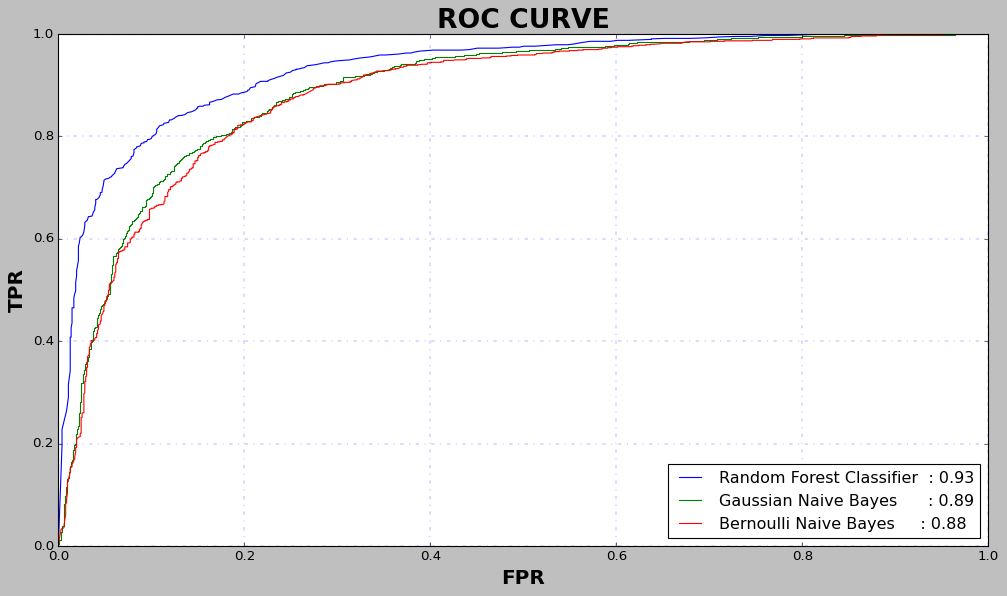

In [97]:
plt.figure(figsize=(15, 8))

plt.plot(fpr1, tpr1, label='Random Forest Classifier  : %0.2f' % auc1)
plt.plot(fpr2, tpr2, label='Gaussian Naive Bayes      : %0.2f' % auc2)
plt.plot(fpr3, tpr3, label='Bernoulli Naive Bayes     : %0.2f' % auc3)
plt.legend(loc=4)

plt.grid(color='b', ls='-.', lw=0.25)
plt.xlabel('FPR', weight='bold', fontsize=18)
plt.ylabel('TPR', weight='bold', fontsize=18)
plt.title('ROC CURVE', weight='bold', fontsize=24)
plt.show()